# üìò Evaluaci√≥n de M√©tricas - Proyecto Profe Ayuda
---
Este notebook eval√∫a el rendimiento del modelo de IA **Profe Ayuda** utilizando m√©tricas de Clasificaci√≥n y Regresi√≥n.
Incluye:
- Matriz de Confusi√≥n
- Accuracy, Precision, Recall, F1-Score
- MAE, MSE, RMSE, R¬≤
- Visualizaci√≥n de resultados
- Conclusiones y buenas pr√°cticas


In [1]:
# ===============================================================
# üì¶ 1. Importar librer√≠as necesarias
# ===============================================================
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    mean_absolute_error, mean_squared_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# ===============================================================
# üìä 2. Datos simulados del modelo Profe Ayuda
# ===============================================================
np.random.seed(42)
y_true = np.random.choice([0,1], size=100, p=[0.4, 0.6])  # 60% correctas
y_pred = y_true.copy()
indices_error = np.random.choice(range(100), size=15, replace=False)
y_pred[indices_error] = 1 - y_pred[indices_error]
y_pred_scores = np.round(np.random.uniform(0.4, 1.0, size=100), 2)

df = pd.DataFrame({
    'Respuesta_Real': y_true,
    'Predicci√≥n_Modelo': y_pred,
    'Confianza_Modelo': y_pred_scores
})
print('Primeras filas del dataset:')
display(df.head())


Primeras filas del dataset:


Respuesta_Real  Predicci√≥n_Modelo  Confianza_Modelo
0               0                  0              0.96
1               1                  1              0.64
2               1                  1              0.71
3               1                  1              0.90
4               0                  0              0.81

üìä M√âTRICAS DE CLASIFICACI√ìN
Accuracy : 0.85
Precision: 0.85
Recall   : 0.87
F1-Score : 0.86


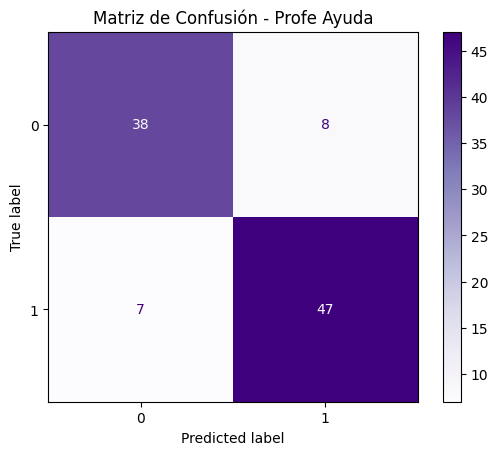

In [3]:
# ===============================================================
# üìà 3. M√©tricas de Clasificaci√≥n
# ===============================================================
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print('üìä M√âTRICAS DE CLASIFICACI√ìN')
print(f'Accuracy : {acc:.2f}')
print(f'Precision: {prec:.2f}')
print(f'Recall   : {rec:.2f}')
print(f'F1-Score : {f1:.2f}')

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title('Matriz de Confusi√≥n - Profe Ayuda')
plt.show()


/tmp/ipython-input-3743909074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1-Score'],


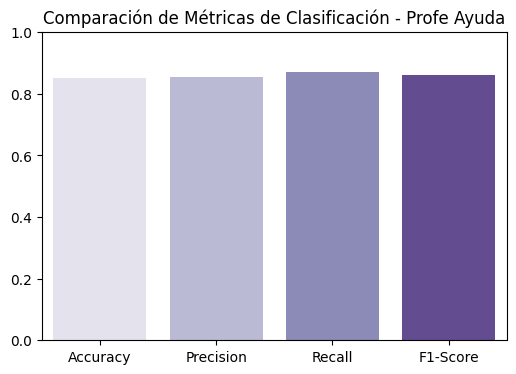

In [4]:
# ===============================================================
# üìä 4. Visualizaci√≥n comparativa de m√©tricas
# ===============================================================
plt.figure(figsize=(6,4))
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
            y=[acc, prec, rec, f1], palette='Purples')
plt.title('Comparaci√≥n de M√©tricas de Clasificaci√≥n - Profe Ayuda')
plt.ylim(0,1)
plt.show()


In [5]:
# ===============================================================
# üìè 5. M√©tricas de Regresi√≥n
# ===============================================================
y_true_reg = y_true.astype(float)
y_pred_reg = y_pred_scores

mae = mean_absolute_error(y_true_reg, y_pred_reg)
mse = mean_squared_error(y_true_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_true_reg, y_pred_reg)

print('üìà M√âTRICAS DE REGRESI√ìN')
print(f'MAE : {mae:.3f}')
print(f'MSE : {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R¬≤  : {r2:.3f}')


üìà M√âTRICAS DE REGRESI√ìN
MAE : 0.496
MSE : 0.323
RMSE: 0.568
R¬≤  : -0.301


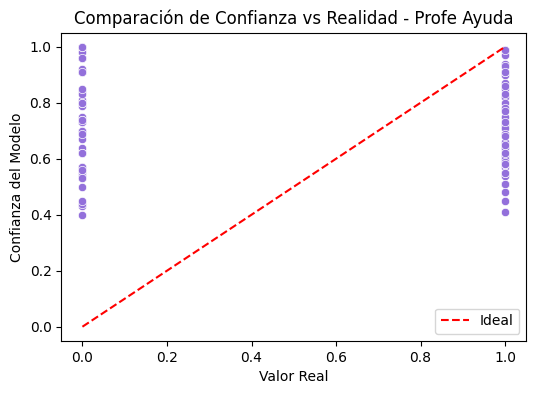

In [6]:
# ===============================================================
# üéØ 6. Visualizaci√≥n de regresi√≥n
# ===============================================================
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_true_reg, y=y_pred_reg, color='mediumpurple')
plt.plot([0,1], [0,1], 'r--', label='Ideal')
plt.xlabel('Valor Real')
plt.ylabel('Confianza del Modelo')
plt.title('Comparaci√≥n de Confianza vs Realidad - Profe Ayuda')
plt.legend()
plt.show()


## ‚úÖ Conclusiones y buenas pr√°cticas
- **Accuracy alto** indica que el modelo acierta en la mayor√≠a de los casos.
- **Precision** mide qu√© tan confiables son las respuestas positivas.
- **Recall** eval√∫a si el modelo identifica correctamente todas las respuestas correctas.
- **F1-Score** combina precisi√≥n y cobertura.

Para la regresi√≥n:
- **MAE y RMSE bajos** indican buena aproximaci√≥n del nivel de confianza.
- **R¬≤ cercano a 1** significa que el modelo explica bien la variabilidad.

### üß∞ Herramientas del PDF:
- scikit-learn ‚úÖ
- matplotlib ‚úÖ
- seaborn ‚úÖ
- MLflow / wandb (opcional)
